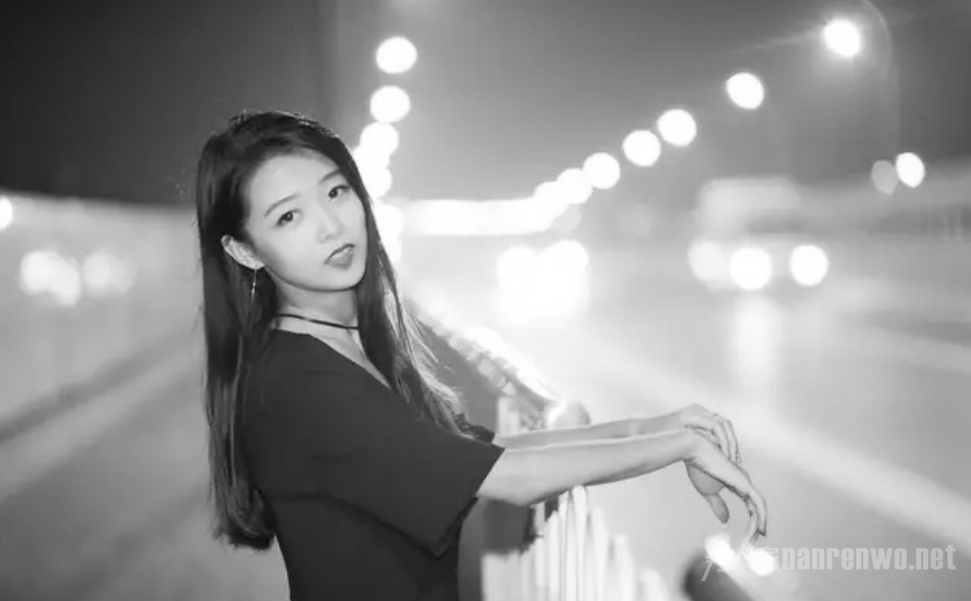

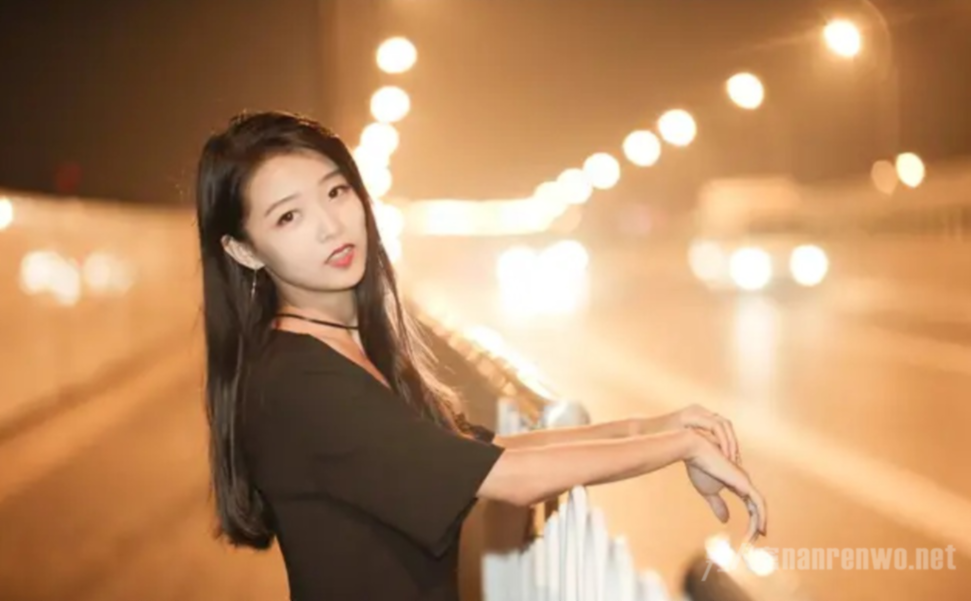

(971, 601)
(601, 971)


In [54]:


import PIL
from PIL import ImageFilter, ImageOps
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
img = Image.open('H:/py_test/ren_xiang.png')
img_gray = img.convert('L')
img_filter = img.filter(ImageFilter.SMOOTH)
#help(img.filter)
display(img_gray)
#help(img.quantize)
display(img_filter)
row, col = img_gray.size
np_img = np.asarray(img_gray)
print( img_gray.size)
print( np_img.shape)

In [81]:
def compute_eq_value(r, prob_hist):
    '''Input a intesity value r of the original image, return a value s of the histogram equalization version of the image'''
    s = 0
    for i in range(0, r):
        s = s + prob_hist[i]
    s = s *(len(prob_hist) - 1)
    return s
def hist_eq(img):
    '''Input an Image, output the histogram equalization version of the image'''
    # compute the histogram of the image
    hist = np.asarray(img.histogram())

    # compute the probability of the histogram 
    row, col = img.size
    print('row: {}, col: {}'.format(row, col))
    img_size = row * col
    prob_hist = hist / img_size
    # mapping a pixel in the original image to the output image
    np_new_img = np.zeros([col,row])
    print('size of np_new_img: {}'.format(np_new_img.size))
    np_img = np.asarray(img)
    print('shape of np_img: {}'.format(np_img.shape))

    for j in range(0, row):
        for i in range(0, col):
            #print('i = {}, j = {}'.format(i, j))
            a = compute_eq_value(np_img[i, j], prob_hist)
            np_new_img[i, j] = a
    new_img = Image.fromarray(np_new_img)
    return new_img

row: 971, col: 601
size of np_new_img: 583571
shape of np_img: (601, 971)


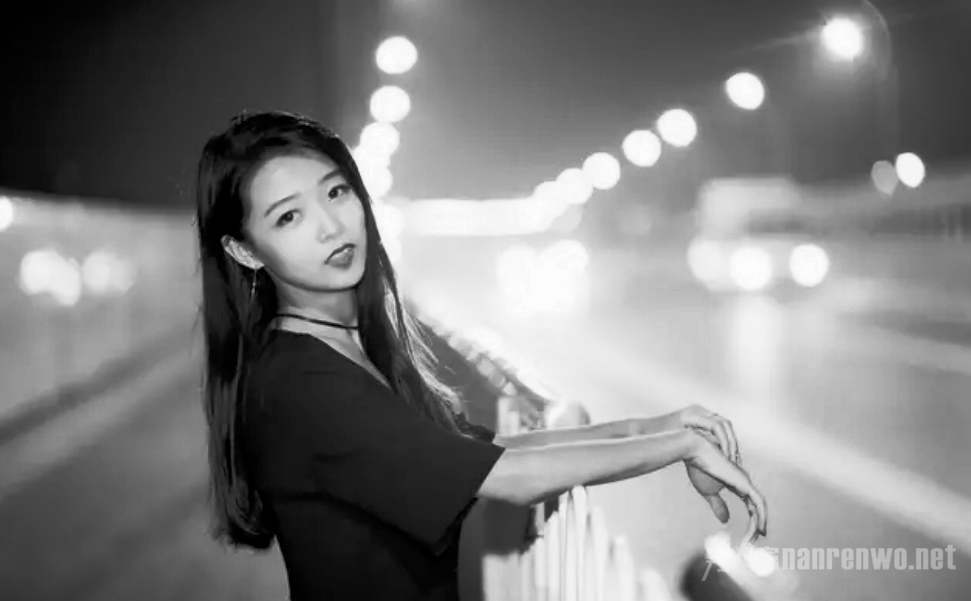

In [82]:
display(hist_eq(img_gray).convert('L'))

256


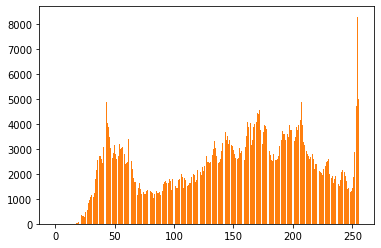

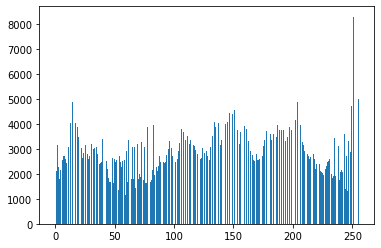

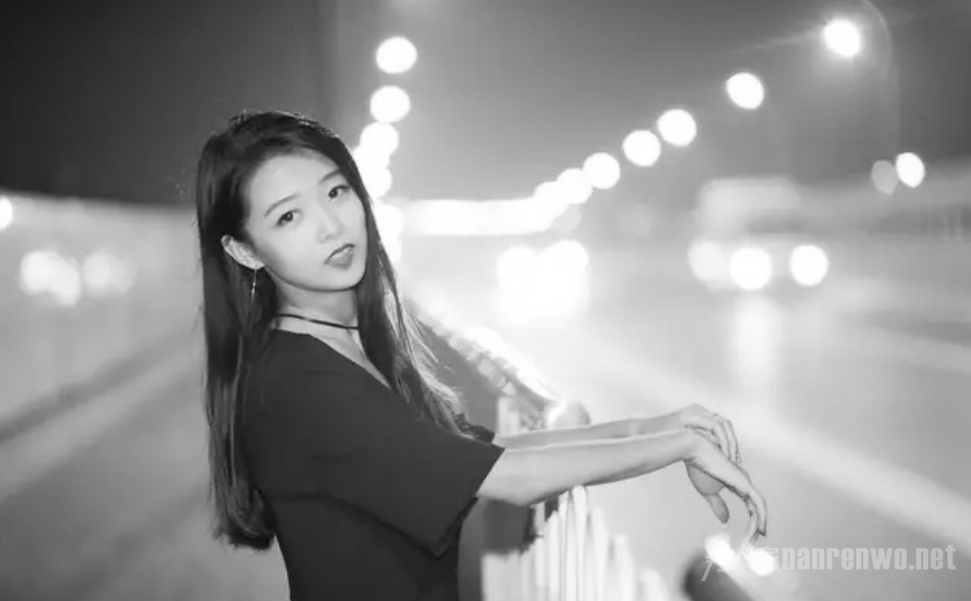

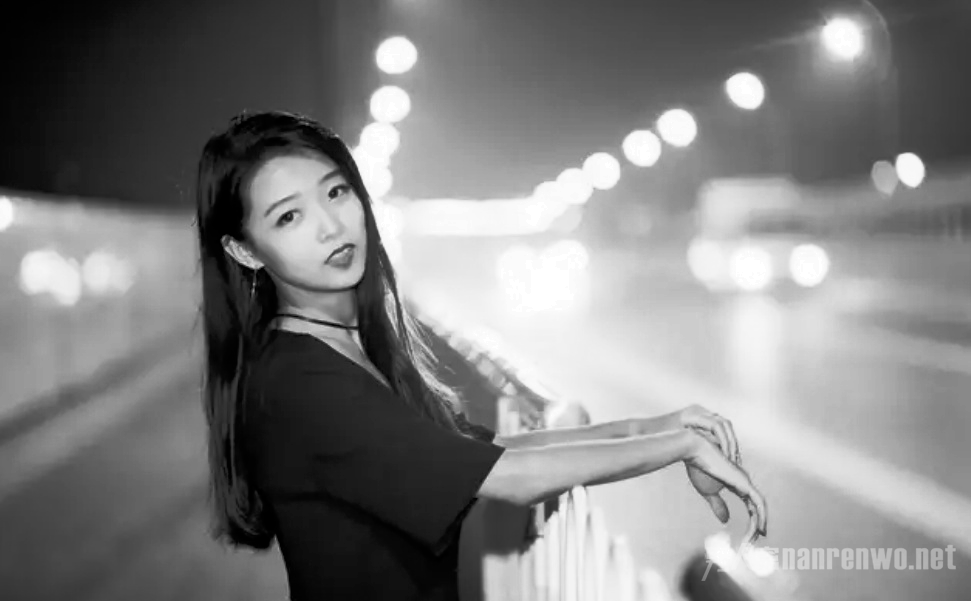

In [83]:
his_gray = img_gray.histogram()
print(len(his_gray))
x = np.linspace(0, len(his_gray)-1, num = len(his_gray))
#print(x)
#help(np.linspace)
plt.bar(x, his_gray)
plt.show()
img_eq = ImageOps.equalize(img_gray)
his_eq = img_eq.histogram()
plt.bar(x, his_eq)
plt.show()
display(img_gray)
display(img_eq)